n = 7.592879122710541 ± 0.12401015696224792


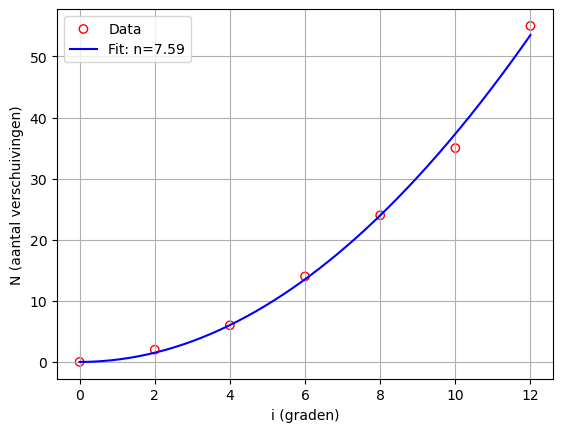

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def N_model(i, n):
    lam = 532e-9   # golflengte (m)
    d   = 5e-3     # dikte (m)
    return (2 * d / lam) * (n - np.sqrt(n**2 - np.sin(i)**2))

i_deg  = np.array([0, 2, 4, 6, 8, 10, 12])
i_rad  = np.deg2rad(i_deg)
N_data = np.array([0, 2, 6, 14, 24, 35, 55]) # testwaardes

p0 = [1.5]

popt, pcov = curve_fit(N_model, i_rad, N_data, p0=p0)
perr = np.sqrt(np.diag(pcov))

print("n =", popt[0], "±", perr[0])

i_fit = np.linspace(0, np.deg2rad(12), 300)
plt.scatter(i_deg, N_data, facecolors='none', edgecolors='r', label="Data")
plt.plot(np.rad2deg(i_fit), N_model(i_fit, *popt), 'b-', label=f"Fit: n={popt[0]:.2f}")
plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid(True)
plt.show()


Bronnen afleiding 
https://vlab.amrita.edu/index.php?brch=189&cnt=1&sim=1519&sub=1

https://lo-amrt.vlabs.ac.in/exp/michelsons-interferometer-refractive/theory.html

n = 7.588561905664108 ± 0.10976748489869954


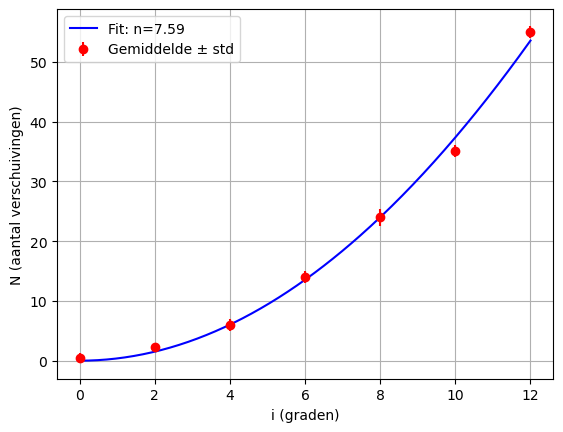

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def N_model(i, n):
    lam = 532e-9   # golflengte (m)
    d   = 5e-3     # dikte (m)
    return (2 * d / lam) * (n - np.sqrt(n**2 - np.sin(i)**2))

# Hoeken in graden
i_deg = np.array([0, 2, 4, 6, 8, 10, 12])
i_rad = np.deg2rad(i_deg)

# Ruwe metingen per hoek (voeg gerust meer toe per hoek!)
metingen = [
    [0, 1],       # metingen bij 0°
    [2, 2, 3],    # metingen bij 2°
    [6, 5, 7],    # metingen bij 4°
    [13, 14, 15], # metingen bij 6°
    [23, 25],     # metingen bij 8°
    [35, 36, 34], # metingen bij 10°
    [54, 55, 56]  # metingen bij 12°
]

# Gemiddelde en standaarddeviatie per hoek
N_mean = np.array([np.mean(m) for m in metingen])
N_std  = np.array([np.std(m, ddof=1) for m in metingen])  # ddof=1 → steekproef-std

# Fit uitvoeren op de gemiddelden
p0 = [1.5]
popt, pcov = curve_fit(N_model, i_rad, N_mean, p0=p0, sigma=N_std, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print("n =", popt[0], "±", perr[0])

# Plotten
i_fit = np.linspace(0, np.deg2rad(12), 300)
plt.errorbar(i_deg, N_mean, yerr=N_std, fmt='o', color='r', label="Gemiddelde ± std")
plt.plot(np.rad2deg(i_fit), N_model(i_fit, *popt), 'b-', label=f"Fit: n={popt[0]:.2f}")
plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid(True)
plt.show()
